# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [120]:
# Dependencies

import random
from citipy import citipy

    #API
import requests  #enable making web requests to access and use RESTful API endpoints 
from config import (weather_api_key, g_key)  #Open weather and Google Maps and Places API keys
import json

    #Data manipulation
import numpy as np  #provides fast mathematical computation on arrays and matrices
import pandas as pd  #open source library provides high-performance, easy-to-use data structures and data analysis tools.

    #Data visualisation   
import gmaps  #Embed google maps
from scipy.stats import linregress  #collection of mathematical algorithms and convenience functions - adds significant power to the interactive Python session - manipulating and visualizing data.
from matplotlib import pyplot as plt  #Plotting library
#For linear regression
import scipy.stats as st

#gmaps.configure(api_key=g_key)

## Generate Cities List

In [121]:
#create a latitude range of 600 items  - random numbers from -90 to +90 - need 2 decimal places
#create a longitude range of 600 items - random numbers from -180 to 180 - need 2 decimal places
    #https://pynative.com/python-get-random-float-numbers/

LatList = []
LongList = []
for lat in range(0,1500):
    LatList.append(round(random.uniform(-90, 90), 2))   
    LongList.append(round(random.uniform(-180, 180), 2))



In [122]:
#Coords = zip(LatList, LongList)
#Coords


In [123]:
#Create dataframe with the two lists
coords = pd.DataFrame(list(zip(LatList, LongList)), 
              columns =['Latitiude', 'Longitude'])
coords.head(2)

,Latitiude,Longitude
0,-23.47,22.91
1,32.97,-7.07


In [124]:
#Create a new City column in coords

coords['City'] = "" 

coords.head(2)

,Latitiude,Longitude,City
0,-23.47,22.91,
1,32.97,-7.07,


In [125]:
#create an empty city list
cities = []

#How to use citipy to get city name
    #https://github.com/wingchen/citipy
        #https://pydoc.net/citipy/0.0.5/citipy.citipy/
        #https://github.com/wingchen/citipy/blob/master/citipy/citipy.py
            #city = citipy.nearest_city(22.99, 120.21)
            #city.city_name

for x in range(0,len(coords)):
    #print(coords["Latitiude"][x], coords["Longitude"][x])
    cityget = citipy.nearest_city(coords["Latitiude"][x], coords["Longitude"][x])
    cityname = cityget.city_name
    
    cities.append(cityname)
    
coords['City'] = cities
coords

,Latitiude,Longitude,City
0,-23.47,22.91,kang
1,32.97,-7.07,casablanca
2,-12.31,-83.86,huarmey
3,-8.17,-177.04,vaitupu
4,71.83,100.25,khatanga
...,...,...,...
1495,53.09,-44.36,nanortalik
1496,68.45,-53.92,kangaatsiaq
1497,42.16,137.16,olga
1498,41.63,93.06,hami


In [126]:
#removed duplicates
# Getting the duplicate cities
    #https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/#:~:text=To%20find%20%26%20select%20the%20duplicate,argument%20is%20'first').
coordsduplicates = coords[coords.duplicated(['City'])]
coordsduplicates

,Latitiude,Longitude,City
19,-37.18,106.18,busselton
29,-61.42,55.92,taolanaro
31,49.35,158.40,severo-kurilsk
36,-34.89,5.45,saldanha
37,-57.79,90.92,busselton
...,...,...,...
1492,-30.31,-100.73,lebu
1494,73.52,-158.79,barrow
1495,53.09,-44.36,nanortalik
1498,41.63,93.06,hami


In [127]:
# First create a list of the indexes that are duplicates
duplicateindex = coordsduplicates.index
print(duplicateindex)
len(duplicateindex)

Int64Index([  19,   29,   31,   36,   37,   53,   57,   59,   74,   79,
            ...
            1482, 1483, 1484, 1489, 1491, 1492, 1494, 1495, 1498, 1499],
           dtype='int64', length=875)


875

In [128]:
#Drop the duplicate IDs
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
coordsunique = coords.drop(coords.index[[duplicateindex]])

print(len(coordsunique))
coordsunique.head(30)

625


,Latitiude,Longitude,City
0,-23.47,22.91,kang
1,32.97,-7.07,casablanca
2,-12.31,-83.86,huarmey
3,-8.17,-177.04,vaitupu
4,71.83,100.25,khatanga
5,-52.62,100.65,busselton
6,75.64,-125.37,tuktoyaktuk
7,5.30,-29.32,sao filipe
8,22.14,-115.66,constitucion
9,37.40,-68.40,nantucket


In [129]:
#Missing indexes - reset index
coordsunique.index=range(0,len(coordsunique))
print(len(coordsunique))
coordsunique.head(30)

625


,Latitiude,Longitude,City
0,-23.47,22.91,kang
1,32.97,-7.07,casablanca
2,-12.31,-83.86,huarmey
3,-8.17,-177.04,vaitupu
4,71.83,100.25,khatanga
5,-52.62,100.65,busselton
6,75.64,-125.37,tuktoyaktuk
7,5.30,-29.32,sao filipe
8,22.14,-115.66,constitucion
9,37.40,-68.40,nantucket


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [130]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)

In [131]:
#Test URL
#print(query_url + cities[0])

In [132]:
# Test Retrieving data and converting it into JSON
#print(requests.get(query_url + cities[0]).json())

In [133]:
# Test Pretty Print the output of the JSON
responsetest1 = requests.get(query_url + coordsunique["City"][1]).json()
print(json.dumps(responsetest1, indent=4, sort_keys=True))
responsetest2 = requests.get(query_url + coordsunique["City"][2]).json()
print(json.dumps(responsetest2, indent=4, sort_keys=True))
responsetest3 = requests.get(query_url + coordsunique["City"][3]).json()
print(json.dumps(responsetest3, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 33.5928,
        "lon": -7.6192
    },
    "dt": 1610641653,
    "id": 2553604,
    "main": {
        "feels_like": 12.06,
        "humidity": 55,
        "pressure": 1028,
        "temp": 14.51,
        "temp_max": 15,
        "temp_min": 13
    },
    "name": "Casablanca",
    "sys": {
        "country": "MA",
        "id": 2386,
        "sunrise": 1610609691,
        "sunset": 1610646232,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 2.06
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -10.0681,
        "lon": -78.1522
    },
    "dt": 1610641740,
    "id":

In [134]:
coordsunique

,Latitiude,Longitude,City
0,-23.47,22.91,kang
1,32.97,-7.07,casablanca
2,-12.31,-83.86,huarmey
3,-8.17,-177.04,vaitupu
4,71.83,100.25,khatanga
...,...,...,...
620,19.20,-88.42,chunhuhub
621,43.26,-111.09,jackson
622,39.08,39.83,tunceli
623,68.45,-53.92,kangaatsiaq


In [135]:
#Test for loop
latnewt = []
longnewt = []
countryt = []
datetimet = []
tempst = []
humidt = []
cloudt = []
windt = []
for t in range(0,25):
    
    
    responsetest1 = requests.get(query_url + coordsunique["City"][t]).json()
    
    if responsetest1["cod"] != "404":
    
    #if responsetest1.cod != 200:
    #    continue
        try:
            print(str((coordsunique.index[t])+1) + " Retrieving data for " + coordsunique["City"][t])
            latnewt.append(responsetest1["coord"]["lat"])
            longnewt.append(responsetest1["coord"]["lon"]) 
            countryt.append(responsetest1["sys"]["country"])
            convertdate = pd.to_datetime(responsetest1["dt"], unit='s')
            datetimet.append(convertdate)  
            tempst.append(responsetest1["main"]["temp"])
            humidt.append(responsetest1["main"]["humidity"])
            cloudt.append(responsetest1["clouds"]["all"])
            windt.append(responsetest1["wind"]["speed"])


        except KeyError:
            countryt.append(np.nan)
            datetimet.append(np.nan)
            tempst.append(np.nan)
            humidt.append(np.nan)
            cloudt.append(np.nan)
            windt.append(np.nan)
    else: 
        print(" City Not Found ")
    

1 Retrieving data for kang
2 Retrieving data for casablanca
3 Retrieving data for huarmey
 City Not Found 
5 Retrieving data for khatanga
6 Retrieving data for busselton
7 Retrieving data for tuktoyaktuk
8 Retrieving data for sao filipe
9 Retrieving data for constitucion
10 Retrieving data for nantucket
11 Retrieving data for avarua
12 Retrieving data for iralaya
13 Retrieving data for new glasgow
14 Retrieving data for albany
15 Retrieving data for faanui
16 Retrieving data for cabo san lucas
17 Retrieving data for victoria
18 Retrieving data for sabzevar
19 Retrieving data for mananjary
20 Retrieving data for yellowknife
21 Retrieving data for port elizabeth
22 Retrieving data for margate
23 Retrieving data for lasa
24 Retrieving data for ixtapa
25 Retrieving data for saldanha


In [136]:
#Data check
print(latnewt)
print(longnewt)
print(countryt)
print(datetimet)
print(tempst)
print(humidt)
print(cloudt)
print(windt)

[-23.6752, 33.5928, -10.0681, 71.9667, -33.65, 69.4541, 14.8961, -35.3333, 41.2835, -21.2078, 15, 45.5834, 42.6001, -16.4833, 22.8909, 22.2855, 36.2126, -21.2167, 62.456, -33.918, 51.3813, 46.6166, 20.7, -33.0117]
[22.7876, -7.6192, -78.1522, 102.5, 115.3333, -133.0374, -24.4956, -72.4167, -70.0995, -159.775, -83.2333, -62.6486, -73.9662, -151.75, -109.9124, 114.1577, 57.6819, 48.3333, -114.3525, 25.5701, 1.3862, 10.7002, -105.2, 17.9442]
['BW', 'MA', 'PE', 'RU', 'AU', 'CA', 'CV', 'CL', 'US', 'CK', 'HN', 'CA', 'US', 'PF', 'MX', 'HK', 'IR', 'MG', 'CA', 'ZA', 'GB', 'IT', 'MX', 'ZA']
[Timestamp('2021-01-14 16:29:01'), Timestamp('2021-01-14 16:28:34'), Timestamp('2021-01-14 16:29:02'), Timestamp('2021-01-14 16:29:03'), Timestamp('2021-01-14 16:29:04'), Timestamp('2021-01-14 16:29:05'), Timestamp('2021-01-14 16:29:05'), Timestamp('2021-01-14 16:29:06'), Timestamp('2021-01-14 16:28:40'), Timestamp('2021-01-14 16:29:07'), Timestamp('2021-01-14 16:29:07'), Timestamp('2021-01-14 16:29:08'), Tim

In [137]:
# Adding temps, Humidity, Cloudiness and Wind Speed to the coods dataframe
#Create a series of list of temperatures for each city
latnew = []
longnew = []
country = []
datetime = []
temps = []
humid = []
cloud = []
wind = []

   

# Prints out the current number and name of the city they are currently retrieving data for

# Loop through the list of cities and perform a request for data on each
for i in range(0, len(coordsunique)):
#for i in range(0,50):
    
    response = requests.get(query_url + coordsunique["City"][i]).json()
    
    #https://www.geeksforgeeks.org/python-find-current-weather-of-any-city-using-openweathermap-api/
    if response["cod"] != "404":
    
        try:
            print("Processing Record " + str((coordsunique.index[i])+1) + " | " + coordsunique["City"][i])
            latnew.append(response["coord"]["lat"])
            longnew.append(response["coord"]["lon"])
            country.append(response["sys"]["country"])
            convertdate = pd.to_datetime(response["dt"], unit='s')
            datetime.append(convertdate)  
            temps.append(response["main"]["temp"])
            humid.append(response["main"]["humidity"])
            cloud.append(response["clouds"]["all"])
            wind.append(response["wind"]["speed"])            

        except KeyError:
            latnew.append(np.nan)
            longnew.append(np.nan)
            country.append(np.nan)
            datetime.append(np.nan)
            temps.append(np.nan)
            humid.append(np.nan)
            cloud.append(np.nan)
            wind.append(np.nan)
    
    else:
        print(" City Not Found ")
        latnew.append(np.nan)
        longnew.append(np.nan)
        country.append(np.nan)
        datetime.append(np.nan)
        temps.append(np.nan)
        humid.append(np.nan)
        cloud.append(np.nan)
        wind.append(np.nan)
        

Processing Record 1 | kang
Processing Record 2 | casablanca
Processing Record 3 | huarmey
 City Not Found 
Processing Record 5 | khatanga
Processing Record 6 | busselton
Processing Record 7 | tuktoyaktuk
Processing Record 8 | sao filipe
Processing Record 9 | constitucion
Processing Record 10 | nantucket
Processing Record 11 | avarua
Processing Record 12 | iralaya
Processing Record 13 | new glasgow
Processing Record 14 | albany
Processing Record 15 | faanui
Processing Record 16 | cabo san lucas
Processing Record 17 | victoria
Processing Record 18 | sabzevar
Processing Record 19 | mananjary
Processing Record 20 | yellowknife
Processing Record 21 | port elizabeth
Processing Record 22 | margate
Processing Record 23 | lasa
Processing Record 24 | ixtapa
Processing Record 25 | saldanha
Processing Record 26 | severo-kurilsk
Processing Record 27 | san miguel de cauri
 City Not Found 
Processing Record 29 | olenino
Processing Record 30 | barrow
Processing Record 31 | los llanos de aridane
Proces

Processing Record 263 | san cristobal
Processing Record 264 | farafangana
Processing Record 265 | campbellsville
Processing Record 266 | ilebo
Processing Record 267 | mon
Processing Record 268 | anito
Processing Record 269 | byron bay
Processing Record 270 | carahue
Processing Record 271 | inta
Processing Record 272 | vostok
Processing Record 273 | bac lieu
Processing Record 274 | marystown
Processing Record 275 | pondicherry
Processing Record 276 | verkhoyansk
Processing Record 277 | halifax
Processing Record 278 | ilave
Processing Record 279 | kantang
Processing Record 280 | cravo norte
Processing Record 281 | moron
Processing Record 282 | wexford
Processing Record 283 | seoul
Processing Record 284 | saint-philippe
Processing Record 285 | healdsburg
 City Not Found 
Processing Record 287 | sovetskiy
Processing Record 288 | komsomolskiy
Processing Record 289 | ribeira grande
Processing Record 290 | muros
Processing Record 291 | alyangula
Processing Record 292 | klaksvik
Processing Rec

Processing Record 516 | pringsewu
Processing Record 517 | iisalmi
Processing Record 518 | mandurah
Processing Record 519 | morehead
Processing Record 520 | grand gaube
 City Not Found 
Processing Record 522 | mahanoro
Processing Record 523 | vesele
Processing Record 524 | panaba
Processing Record 525 | nemuro
Processing Record 526 | dudinka
Processing Record 527 | ust-kulom
Processing Record 528 | outjo
Processing Record 529 | waitati
Processing Record 530 | celestun
Processing Record 531 | denpasar
 City Not Found 
Processing Record 533 | lotoshino
Processing Record 534 | yaguajay
Processing Record 535 | northam
Processing Record 536 | westport
Processing Record 537 | comodoro rivadavia
Processing Record 538 | oistins
Processing Record 539 | koungou
 City Not Found 
Processing Record 541 | ust-ishim
Processing Record 542 | broome
Processing Record 543 | motala
Processing Record 544 | evensk
Processing Record 545 | fort dodge
Processing Record 546 | san ignacio
Processing Record 547 | 

In [161]:
#Data Check
print(len(coordsunique))
print(len(latnew))
print(len(longnew))
print(len(country))
print(len(datetime))
print(len(temps))
print(len(humid))
print(len(cloud))
print(len(wind))



625
625
625
625
625
625
625
625
625


In [162]:
#Drop original Lat and Long columns
cityweather = coordsunique.drop(columns=["Latitiude", "Longitude"])
cityweather

,City
0,kang
1,casablanca
2,huarmey
3,vaitupu
4,khatanga
...,...
620,chunhuhub
621,jackson
622,tunceli
623,kangaatsiaq


In [163]:
# Add new colums to df

cityweather['Country'] = country
cityweather["Latitude"] = latnew
cityweather["Longitude"] = longnew
cityweather['Date'] = datetime
cityweather['Temperature'] = temps
cityweather['Humidity'] = humid
cityweather['Cloudiness'] = cloud
cityweather['Wind Speed'] = wind
cityweather

,City,Country,Latitude,Longitude,Date,Temperature,Humidity,Cloudiness,Wind Speed
0,kang,BW,-23.6752,22.7876,2021-01-14 16:29:01,30.77,33.0,69.0,2.41
1,casablanca,MA,33.5928,-7.6192,2021-01-14 16:27:33,14.51,55.0,40.0,2.06
2,huarmey,PE,-10.0681,-78.1522,2021-01-14 16:29:00,23.74,72.0,100.0,3.89
3,vaitupu,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,khatanga,RU,71.9667,102.5000,2021-01-14 16:29:03,-44.88,77.0,91.0,0.94
...,...,...,...,...,...,...,...,...,...
620,chunhuhub,MX,19.5500,-88.6833,2021-01-14 16:35:40,22.60,83.0,98.0,1.29
621,jackson,US,42.4165,-122.8345,2021-01-14 16:35:41,3.77,93.0,90.0,0.46
622,tunceli,TR,39.1083,39.5471,2021-01-14 16:35:41,5.27,81.0,75.0,3.60
623,kangaatsiaq,GL,68.3065,-53.4641,2021-01-14 16:35:42,-8.99,96.0,100.0,1.80


In [164]:
cityweather.dropna(inplace= True)
cityweather

,City,Country,Latitude,Longitude,Date,Temperature,Humidity,Cloudiness,Wind Speed
0,kang,BW,-23.6752,22.7876,2021-01-14 16:29:01,30.77,33.0,69.0,2.41
1,casablanca,MA,33.5928,-7.6192,2021-01-14 16:27:33,14.51,55.0,40.0,2.06
2,huarmey,PE,-10.0681,-78.1522,2021-01-14 16:29:00,23.74,72.0,100.0,3.89
4,khatanga,RU,71.9667,102.5000,2021-01-14 16:29:03,-44.88,77.0,91.0,0.94
5,busselton,AU,-33.6500,115.3333,2021-01-14 16:29:04,15.15,73.0,35.0,0.45
...,...,...,...,...,...,...,...,...,...
620,chunhuhub,MX,19.5500,-88.6833,2021-01-14 16:35:40,22.60,83.0,98.0,1.29
621,jackson,US,42.4165,-122.8345,2021-01-14 16:35:41,3.77,93.0,90.0,0.46
622,tunceli,TR,39.1083,39.5471,2021-01-14 16:35:41,5.27,81.0,75.0,3.60
623,kangaatsiaq,GL,68.3065,-53.4641,2021-01-14 16:35:42,-8.99,96.0,100.0,1.80


In [165]:
cityweather.index=range(0,len(cityweather))
cityweather.head()

,City,Country,Latitude,Longitude,Date,Temperature,Humidity,Cloudiness,Wind Speed
0,kang,BW,-23.6752,22.7876,2021-01-14 16:29:01,30.77,33.0,69.0,2.41
1,casablanca,MA,33.5928,-7.6192,2021-01-14 16:27:33,14.51,55.0,40.0,2.06
2,huarmey,PE,-10.0681,-78.1522,2021-01-14 16:29:00,23.74,72.0,100.0,3.89
3,khatanga,RU,71.9667,102.5000,2021-01-14 16:29:03,-44.88,77.0,91.0,0.94
4,busselton,AU,-33.6500,115.3333,2021-01-14 16:29:04,15.15,73.0,35.0,0.45


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

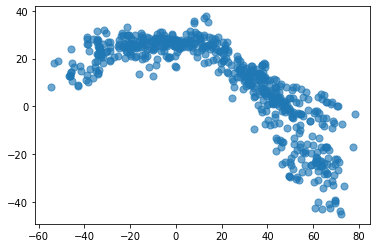

In [166]:
#SCATTER PLOT REAL
    #Temperature vs. Latitude scatterplot
        #x-axis Latitude
        #y-axis Temperature
        #To make a neat x axis labels

xlat = np.arange(-90, 90+1, 10)
plt.scatter(cityweather["Latitude"], cityweather["Temperature"], s=50, alpha=0.65)
plt.savefig('Latitude vs. Temperature Plot.png')

Latitude vs. Temperature Plot - Plot strongly indicates temperatures are higher the close you are to the equator.

## Latitude vs. Humidity Plot

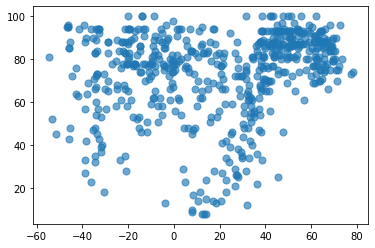

In [167]:
#SCATTER PLOT REAL
    #Humidity vs. Latitude scatterplot
        #x-axis Latitude
        #y-axis Temperature
        #To make a neat x axis labels

xlat = np.arange(-90, 90+1, 10)
plt.scatter(cityweather["Latitude"], cityweather["Humidity"], s=50, alpha=0.65)
plt.savefig('Latitude vs. Humidity Plot.png')

Latitude vs. Humidity Plot - The plot does not show an indication of correlation of latitude and humidty.

## Latitude vs. Cloudiness Plot

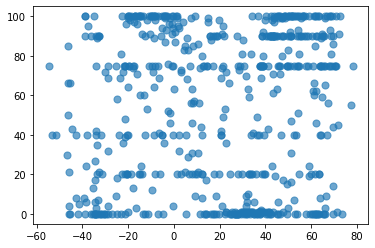

In [168]:
#SCATTER PLOT REAL
    #Cloudiness vs. Latitude scatterplot
        #x-axis Latitude
        #y-axis Temperature
        #To make a neat x axis labels

xlat = np.arange(-90, 90+1, 10)
plt.scatter(cityweather["Latitude"], cityweather["Cloudiness"], s=50, alpha=0.65)
plt.savefig('Latitude vs. Cloudiness Plot.png')

Latitude vs. Cloudiness Plot - The plot does not show an indication of correlation of latitude and cloudiness.

## Latitude vs. Wind Speed Plot

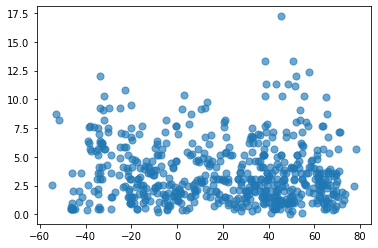

In [169]:
#SCATTER PLOT REAL
    #Wind Speed vs. Latitude scatterplot
        #x-axis Latitude
        #y-axis Temperature
        #To make a neat x axis labels

xlat = np.arange(-90, 90+1, 10)
plt.scatter(cityweather["Latitude"], cityweather["Wind Speed"], s=50, alpha=0.65)
plt.savefig('Latitude vs. Wind Speed Plot.png')

Latitude vs. Wind Speed Plot - The plot does not show an indication of correlation of latitude and wind speed.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [170]:
#df.to_csv('file_name.csv')
#If you want to export without the index, simply add index=False;
#df.to_csv('file_name.csv', index=False)

#df.to_csv (r'C:\Users\Ron\Desktop\export_dataframe.csv', index = False, header=True)

#print (df)


cityweather.to_csv("CitiesWeather.csv", index=False)
cityweather


,City,Country,Latitude,Longitude,Date,Temperature,Humidity,Cloudiness,Wind Speed
0,kang,BW,-23.6752,22.7876,2021-01-14 16:29:01,30.77,33.0,69.0,2.41
1,casablanca,MA,33.5928,-7.6192,2021-01-14 16:27:33,14.51,55.0,40.0,2.06
2,huarmey,PE,-10.0681,-78.1522,2021-01-14 16:29:00,23.74,72.0,100.0,3.89
3,khatanga,RU,71.9667,102.5000,2021-01-14 16:29:03,-44.88,77.0,91.0,0.94
4,busselton,AU,-33.6500,115.3333,2021-01-14 16:29:04,15.15,73.0,35.0,0.45
...,...,...,...,...,...,...,...,...,...
577,chunhuhub,MX,19.5500,-88.6833,2021-01-14 16:35:40,22.60,83.0,98.0,1.29
578,jackson,US,42.4165,-122.8345,2021-01-14 16:35:41,3.77,93.0,90.0,0.46
579,tunceli,TR,39.1083,39.5471,2021-01-14 16:35:41,5.27,81.0,75.0,3.60
580,kangaatsiaq,GL,68.3065,-53.4641,2021-01-14 16:35:42,-8.99,96.0,100.0,1.80


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [171]:
#check maximum himidity
cityweather["Humidity"].max()
print("The maximum humidity in the data frame is " + str(cityweather["Humidity"].max()) + ", therefore no need to drop any cities")

The maximum humidity in the data frame is 100.0, therefore no need to drop any cities


In [172]:
#  Get the indices of cities that have humidity over 100%.


In [173]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Linear Regression

In [174]:
#create 2 data frames with lat <0 and lat >0

citynorth = cityweather.loc[cityweather["Latitude"] > 0, :]
citynorth

,City,Country,Latitude,Longitude,Date,Temperature,Humidity,Cloudiness,Wind Speed
1,casablanca,MA,33.5928,-7.6192,2021-01-14 16:27:33,14.51,55.0,40.0,2.06
3,khatanga,RU,71.9667,102.5000,2021-01-14 16:29:03,-44.88,77.0,91.0,0.94
5,tuktoyaktuk,CA,69.4541,-133.0374,2021-01-14 16:29:05,-22.00,84.0,90.0,3.60
6,sao filipe,CV,14.8961,-24.4956,2021-01-14 16:29:05,23.84,66.0,99.0,6.92
8,nantucket,US,41.2835,-70.0995,2021-01-14 16:28:40,6.59,87.0,90.0,3.60
...,...,...,...,...,...,...,...,...,...
577,chunhuhub,MX,19.5500,-88.6833,2021-01-14 16:35:40,22.60,83.0,98.0,1.29
578,jackson,US,42.4165,-122.8345,2021-01-14 16:35:41,3.77,93.0,90.0,0.46
579,tunceli,TR,39.1083,39.5471,2021-01-14 16:35:41,5.27,81.0,75.0,3.60
580,kangaatsiaq,GL,68.3065,-53.4641,2021-01-14 16:35:42,-8.99,96.0,100.0,1.80


In [175]:
#create 2 data frames with lat <0 and lat >0

citysouth = cityweather.loc[cityweather["Latitude"] < 0, :]
citysouth

,City,Country,Latitude,Longitude,Date,Temperature,Humidity,Cloudiness,Wind Speed
0,kang,BW,-23.6752,22.7876,2021-01-14 16:29:01,30.77,33.0,69.0,2.41
2,huarmey,PE,-10.0681,-78.1522,2021-01-14 16:29:00,23.74,72.0,100.0,3.89
4,busselton,AU,-33.6500,115.3333,2021-01-14 16:29:04,15.15,73.0,35.0,0.45
7,constitucion,CL,-35.3333,-72.4167,2021-01-14 16:29:06,18.71,47.0,0.0,5.49
9,avarua,CK,-21.2078,-159.7750,2021-01-14 16:29:07,25.00,88.0,75.0,2.06
...,...,...,...,...,...,...,...,...,...
545,tautira,PF,-17.7333,-149.1500,2021-01-14 16:35:17,25.00,78.0,75.0,0.51
555,tshikapa,CD,-6.4167,20.8000,2021-01-14 16:35:23,23.02,89.0,41.0,1.81
563,puerto leguizamo,CO,-0.1934,-74.7819,2021-01-14 16:35:28,20.97,98.0,100.0,1.56
567,biak,ID,-0.9131,122.8766,2021-01-14 16:35:31,25.29,82.0,96.0,1.21


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

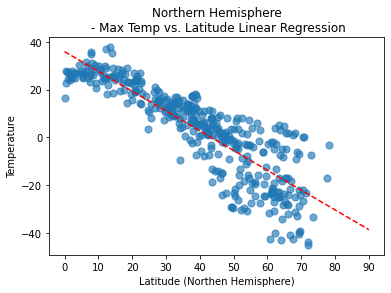

In [176]:
#Scatterplot with linear regression model


northtemp_slope, northtemp_int, northtemp_r, northtemp_p, northtemp_std_err = st.linregress(citynorth["Latitude"], citynorth["Temperature"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatnorth = np.arange(0, 90+1, 10)
northtemp_fit = northtemp_slope * xlatnorth + northtemp_int


plt.scatter(citynorth["Latitude"], citynorth["Temperature"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatnorth, northtemp_fit, "r--")

plt.xticks(xlatnorth)
#plt.figure(figsize=(100, 10))
plt.title('Northern Hemisphere\n - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude (Northen Hemisphere)')
plt.ylabel('Temperature')
plt.savefig('Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')
plt.show()


Northern Hemisphere - Max Temp vs. Latitude Linear Regression - The linear regression could be used with some confidence to predict temperatures based on latitude.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

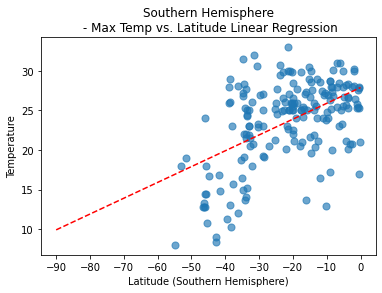

In [177]:
#Scatterplot with linear regression model


southtemp_slope, southtemp_int, southtemp_r, southtemp_p, southtemp_std_err = st.linregress(citysouth["Latitude"], citysouth["Temperature"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatsouth = np.arange(-90, 0+1, 10)
southtemp_fit = southtemp_slope * xlatsouth + southtemp_int


plt.scatter(citysouth["Latitude"], citysouth["Temperature"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatsouth, southtemp_fit, "r--")

plt.xticks(xlatsouth)
#plt.figure(figsize=(100, 10))
plt.title('Southern Hemisphere\n - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Temperature')
plt.savefig('Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')
plt.show()

Southern Hemisphere - Max Temp vs. Latitude Linear Regression - The linear regression indicates that it could be useful to predict temperature based on latitude. The lack of data between the -60 to -90 latitude could be a problem.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

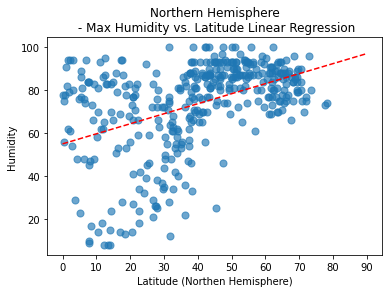

In [178]:
#Scatterplot with linear regression model


northhum_slope, northhum_int, northhum_r, northhum_p, northhum_std_err = st.linregress(citynorth["Latitude"], citynorth["Humidity"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
northhum_fit = northhum_slope * xlatnorth + northhum_int

xlatnorth = np.arange(0, 90+1, 10)
plt.scatter(citynorth["Latitude"], citynorth["Humidity"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatnorth, northhum_fit, "r--")

plt.xticks(xlatnorth)
#plt.figure(figsize=(100, 10))
plt.title('Northern Hemisphere\n - Max Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude (Northen Hemisphere)')
plt.ylabel('Humidity')
plt.savefig('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')
plt.show()

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression - There's a cluster of data which is skewing the positive linear regression but there is enough of a range on the plot to indicate that only after around 40 degrees latutude is there an indication that latitidue affects humidy. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

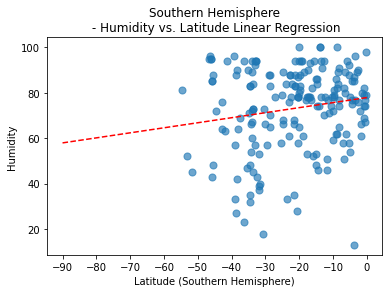

In [179]:
#Scatterplot with linear regression model


southhum_slope, southhum_int, southhum_r, southhum_p, southhum_std_err = st.linregress(citysouth["Latitude"], citysouth["Humidity"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatsouth = np.arange(-90, 0+1, 10)
southhum_fit = southhum_slope * xlatsouth + southhum_int


plt.scatter(citysouth["Latitude"], citysouth["Humidity"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatsouth, southhum_fit, "r--")

plt.xticks(xlatsouth)
#plt.figure(figsize=(100, 10))
plt.title('Southern Hemisphere\n - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Humidity')
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression - The lack of data for a large of of latitudes, and the range of the existing data means you could ignore the slight negative linear regression.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

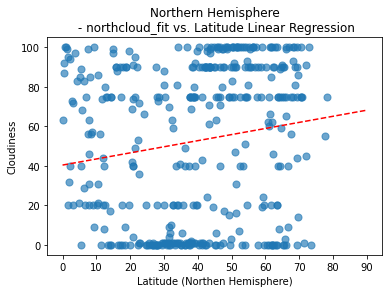

In [180]:
#Scatterplot with linear regression model


northcloud_slope, northcloud_int, northcloud_r, northcloud_p, northcloud_std_err = st.linregress(citynorth["Latitude"], citynorth["Cloudiness"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatnorth = np.arange(0, 90+1, 10)
northcloud_fit = northcloud_slope * xlatnorth + northcloud_int

plt.scatter(citynorth["Latitude"], citynorth["Cloudiness"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatnorth, northcloud_fit, "r--")

plt.xticks(xlatnorth)
#plt.figure(figsize=(100, 10))
plt.title('Northern Hemisphere\n - northcloud_fit vs. Latitude Linear Regression')
plt.xlabel('Latitude (Northen Hemisphere)')
plt.ylabel('Cloudiness')
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression - the range of points on the plot contradict the positive linear regression.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

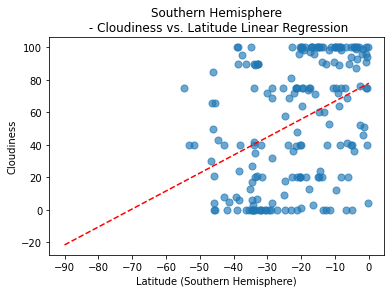

In [181]:
#Scatterplot with linear regression model

southcloud_slope, southcloud_int, southcloud_r, southcloud_p, southcloud_std_err = st.linregress(citysouth["Latitude"], citysouth["Cloudiness"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatsouth = np.arange(-90, 0+1, 10)
southcloud_fit = southcloud_slope * xlatsouth + southcloud_int


plt.scatter(citysouth["Latitude"], citysouth["Cloudiness"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatsouth, southcloud_fit, "r--")

plt.xticks(xlatsouth)
#plt.figure(figsize=(100, 10))
plt.title('Southern Hemisphere\n - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Cloudiness')
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression - Again, the data is skewed due to lack of points.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

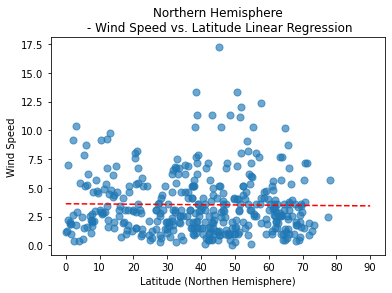

In [182]:
#Scatterplot with linear regression model


northwind_slope, northwind_int, northwind_r, northwind_p, northwind_std_err = st.linregress(citynorth["Latitude"], citynorth["Wind Speed"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatnorth = np.arange(0, 90+1, 10)
northwind_fit = northwind_slope * xlatnorth + northwind_int


plt.scatter(citynorth["Latitude"], citynorth["Wind Speed"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatnorth, northwind_fit, "r--")

plt.xticks(xlatnorth)
#plt.figure(figsize=(100, 10))
plt.title('Northern Hemisphere\n - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude (Northen Hemisphere)')
plt.ylabel('Wind Speed')
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression - Both the data and the near horizontal linear regression indicate that there is no correlation between latitude and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

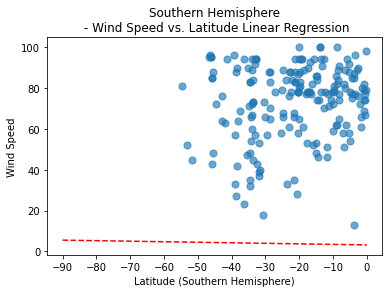

In [183]:
#Scatterplot with linear regression model


southwind_slope, southwind_int, southwind_r, southwind_p, southwind_std_err = st.linregress(citysouth["Latitude"], citysouth["Wind Speed"])

    # Create equation of line to

        #example - vc_fit = vc_slope * year + vc_int
    
xlatsouth = np.arange(-90, 0+1, 10)
southwind_fit = southwind_slope * xlatsouth + southwind_int


plt.scatter(citysouth["Latitude"], citysouth["Humidity"], s=50, alpha=0.65)

    #example - plt.plot(year,vc_fit,"--")
plt.plot(xlatsouth, southwind_fit, "r--")

plt.xticks(xlatsouth)
#plt.figure(figsize=(100, 10))
plt.title('Southern Hemisphere\n - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude (Southern Hemisphere)')
plt.ylabel('Wind Speed')
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression - No correlation between latitude and wind speed.